# Prediction using Supervised Learning
### This notebook demonstrates the implementationof a simple Linear Regression Model using SCIKIT LEARN

In this task we predict the percentage of marks of an student based on the number of study hours.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset
The dataset contains only two variables.

In [3]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Understanding the Data

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization


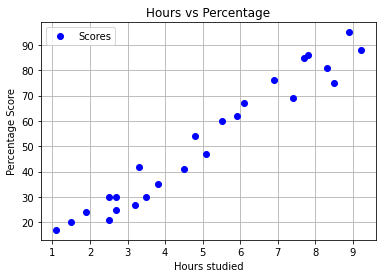

In [5]:
data.plot(x='Hours',y='Scores',style='bo')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


The above graph shows the plotting of Hours Vs Percentage which gives the clear idea that there is a linear relation between our two training samples..

<AxesSubplot:>

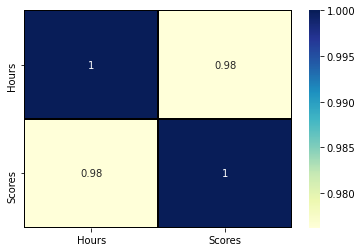

In [13]:
import seaborn as sb
sb.heatmap(data.corr(),annot = True,cmap="YlGnBu",linecolor="black",linewidth=.5)

There is high correlation between the two training samples and both are highly dependent on each other

In [19]:
#seperating features and labels
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values


### Model Building

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=.20,random_state=0)

Splitted our data into training and testing sets. Now It's time to train our Algorithm.

In [21]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

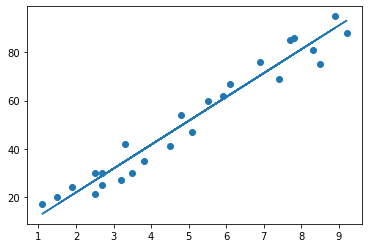

In [22]:
line=regressor.coef_*X+regressor.intercept_

#Plotting the test dataset
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

Now plotted a line which shows that our model is successfully fitted across the data.

In [23]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

### Making Predictions

In [26]:
y_pred=regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [40]:
compared_data = pd.DataFrame({'Actual value' : y_test, 'predicted value' : y_pred})
compared_data

,Actual value,predicted value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 1.0, 'Bar plot comparing Actual and Predicted values of Scores')

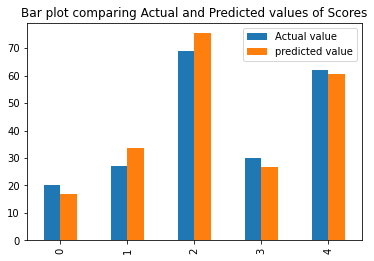

In [46]:
compared_data.plot(kind='bar')
plt.title('Bar plot comparing Actual and Predicted values of Scores')


##### Q:- what will be the predicted score if a student studies for 9.25 hrs/day?

In [44]:
print('Score of a student who studies for 9.25 hrs/day will be ',regressor.predict([[9.25]]))

Score of a student who studies for 9.25 hrs/day will be  [93.69173249]


### Model Evaluation Metrics

In [52]:
print('Mean Squared Error:- {0}\nMean Absolute Error:- {1}'.format(metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))

Mean Squared Error:- 21.5987693072174
Mean Absolute Error:- 4.183859899002975


In [53]:
print("Training Score:- {0}\nTest Score:- {1}".format(regressor.score(X_train,y_train),regressor.score(X_test,y_test)))

Training Score:- 0.9515510725211552
Test Score:- 0.9454906892105356
